In [1]:
import pandas as pd

In [2]:
## KAGGLE

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# train = pd.read_csv('../input/sentimen-restoran/preprocessed_train.csv')
# test = pd.read_csv('../input/sentimen-restoran/preprocessed_test.csv')

In [4]:
train = pd.read_csv('data/preprocessed_train.csv')
test = pd.read_csv('data/preprocessed_test.csv')

In [5]:
train['sentiment'].value_counts()

1    1200
0     580
Name: sentiment, dtype: int64

In [6]:
train.shape

(1780, 14)

In [7]:
sentiment_to_id = {'positive': 1, 'negative': 0}
id_to_sentiment = {1: 'positive', 0: 'negative'}

### Feature Selection (part 1)

In [8]:
X_test = test['cleaned_text']

X_test_sent_barasa = test[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val']]

# X_test_text_sent_barasa = X_test_sent_barasa.copy() + tfidf vector of cleaned text

X_test_sent_trans = test[['trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]

# X_test_text_sent_trans = X_test_sent_trans.copy()+ tfidf vector of cleaned text

y_test = test['sentiment']

### TFIDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# create tfidf that resulting ngram of 1 and ngram of 2
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words=None, max_features=10000)

In [11]:
train_vect = tfidf.fit_transform(train['cleaned_text']).toarray()

In [12]:
train_vect.shape

(1780, 10000)

In [13]:
test_vect = tfidf.transform(test['cleaned_text']).toarray()

### SMOTE

In [14]:
import numpy as np
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [15]:
train_vect = pd.DataFrame(data=train_vect[0:,0:],
                index=[i for i in range(train_vect.shape[0])],
                columns=['f'+str(i) for i in range(train_vect.shape[1])])

In [16]:
train_vect = train_vect.reset_index(drop=True)
train = train.reset_index(drop=True)

In [17]:
X_train = pd.concat([train_vect, train[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val', \
                            'trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]], axis=1, sort=False)

In [18]:
X_train.head()

f0   f1   f2   f3   f4   f5   f6   f7   f8   f9  ...  f9998  f9999  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   barasa_total_pos_word  barasa_total_neg_word  \
0                     19                     19   
1                      7                     11   
2                      6                      5   
3                      4                      4   
4                     21                     26   

   barasa_mean_pos_sentiment_val  barasa_mean_neg_sentiment_val  \
0                       0.078069                       0.149732   
1                       0.095732                       0.136639   
2                       0.087889                       0.104795   
3                       0.040634                       0.085928   
4                       0.119401                       0.149148   

   trans_total_pos_word  trans_total_neg_word  trans_mean_pos_sentiment_val  \
0                    18                    14                      0.049165   
1                     8                    12                      0.102066   
2                    10                     9                      0.068739   
3                     2                     3                      0.028846   
4                    24                    27                      0.094519   

   trans_mean_neg_sentiment_val  
0                      0.075428  
1                      0.133502  
2                      0.129534  
3                      0.096154  
4                      0.077969  

[5 rows x 10008 columns]

In [19]:
X_train.shape

(1780, 10008)

In [20]:
y_train = train['sentiment']

In [21]:
sm = SMOTE(random_state=1)

X_res, y_res = sm.fit_resample(X_train, y_train)

train = X_res.copy()
train['sentiment'] = y_res

In [22]:
train['sentiment'].value_counts()

1    1200
0    1200
Name: sentiment, dtype: int64

In [23]:
train.head()

f0   f1   f2   f3   f4   f5   f6   f7   f8   f9  ...  f9999  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

   barasa_total_pos_word  barasa_total_neg_word  \
0                     19                     19   
1                      7                     11   
2                      6                      5   
3                      4                      4   
4                     21                     26   

   barasa_mean_pos_sentiment_val  barasa_mean_neg_sentiment_val  \
0                       0.078069                       0.149732   
1                       0.095732                       0.136639   
2                       0.087889                       0.104795   
3                       0.040634                       0.085928   
4                       0.119401                       0.149148   

   trans_total_pos_word  trans_total_neg_word  trans_mean_pos_sentiment_val  \
0                    18                    14                      0.049165   
1                     8                    12                      0.102066   
2                    10                     9                      0.068739   
3                     2                     3                      0.028846   
4                    24                    27                      0.094519   

   trans_mean_neg_sentiment_val  sentiment  
0                      0.075428          0  
1                      0.133502          0  
2                      0.129534          0  
3                      0.096154          0  
4                      0.077969          0  

[5 rows x 10009 columns]

In [24]:
train.shape

(2400, 10009)

### Feature Selection (part 2)

In [25]:
train_vect = train.drop(columns=['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val', \
                            'trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val', \
                            'sentiment']).to_numpy()

X_train_sent_barasa = train[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val']]

X_train_sent_trans = train[['trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]

In [26]:
y_train = train['sentiment']

In [27]:
type(train_vect)

numpy.ndarray

In [28]:
train_vect.shape

(2400, 10000)

In [29]:
X_train = train_vect

X_train_text_sent_barasa = np.concatenate((train_vect, X_train_sent_barasa), axis=1)
X_train_text_sent_trans = np.concatenate((train_vect, X_train_sent_trans), axis=1)

In [30]:
X_test = test_vect
X_test_text_sent_barasa = np.concatenate((test_vect, X_test_sent_barasa), axis=1)
X_test_text_sent_trans = np.concatenate((test_vect, X_test_sent_trans), axis=1)

### Train

In [31]:
# Library for Deep Learning
from keras import backend as K

In [32]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### set random seed

In [33]:
import tensorflow as tf

In [34]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [35]:
import random
import numpy as np

#### 1. Base Model (using cleaned_text only)

In [36]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [37]:
X_train.shape

(2400, 10000)

In [38]:
type(X_train)

numpy.ndarray

In [39]:
# Reshaping X_train & X_test
X_train = X_train[:, :, None]
X_test = X_test[:, :, None]

In [40]:
X_train.shape

(2400, 10000, 1)

In [41]:
base_model = Sequential()
base_model.add(LSTM(10, dropout=0.2, input_shape=X_train.shape[1:]))
base_model.add(layers.Dense(8, activation='relu'))
base_model.add(Dropout(0.2))
base_model.add(layers.Dense(1, activation='sigmoid'))

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [42]:
base_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [43]:
EPOCHS = 10
BATCH_SIZE = 1024

history = base_model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 57s 34ms/step - loss: 0.6929 - accuracy: 0.4833 - f1_m: 0.4841 - val_loss: 0.6959 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 2/10
1680/1680 [==============================] - 61s 36ms/step - loss: 0.6917 - accuracy: 0.6548 - f1_m: 0.7934 - val_loss: 0.6993 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 3/10
1680/1680 [==============================] - 63s 38ms/step - loss: 0.6903 - accuracy: 0.6548 - f1_m: 0.7900 - val_loss: 0.7030 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 4/10
1680/1680 [==============================] - 60s 36ms/step - loss: 0.6890 - accuracy: 0.6548 - f1_m: 0.7898 - val_loss: 0.7070 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 5/10
1680/1680 [==============================] - 56s 33ms/step - loss: 0.6871 - accuracy: 0.6548 - f1_m: 0.7922 - val_loss: 0.7112 - val_accuracy: 0.1389 - val_f1_m: 0.2439
Epoch 6/10
1680/1680 [==============================]

In [44]:
def save_model(model, FILE_NAME):
    # serialize model to YAML
    model_yaml = model.to_yaml()
    with open(FILE_NAME +'.yaml', "w") as yaml_file:
        yaml_file.write(model_yaml)
    # serialize weights to HDF5
    model.save_weights(FILE_NAME +'.h5')
    print("Saved model to disk")

In [45]:
save_model(base_model, 'model/LSTM smote_tfidf_base')

Saved model to disk


In [46]:
history.history

{'val_loss': [0.6959403157234192,
  0.6992856860160828,
  0.702983021736145,
  0.7069568634033203,
  0.7112306952476501,
  0.7158432006835938,
  0.7208133339881897,
  0.7261988520622253,
  0.732029914855957,
  0.7384358644485474],
 'val_accuracy': [0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272,
  0.1388888955116272],
 'val_f1_m': [0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635,
  0.24390242993831635],
 'loss': [0.692934775352478,
  0.691688981510344,
  0.6903094603901818,
  0.6889641137350173,
  0.6870535708609081,
  0.6853544638270423,
  0.6838897795904251,
  0.6817853711900257,
  0.6803796739805312,
  0.6779843199820745],
 'accuracy': [0.48333332,
  0.6547619,
  0.6547619,
  0.654761

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

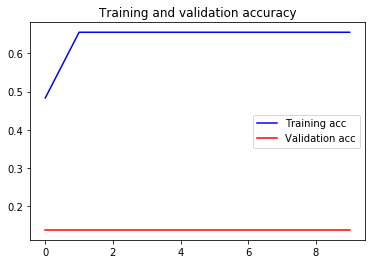

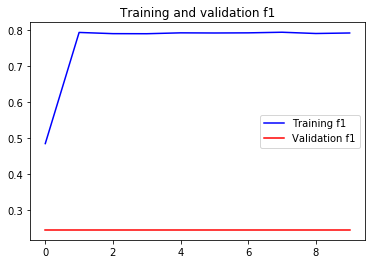

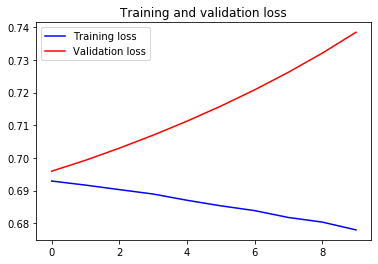

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [49]:
score = base_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 7ms/step

f1: 0.786885142326355
accuracy: 0.6486486196517944
LOSS: 0.6770550608634949


In [50]:
# predict probabilities for val set
y_pred_probs = base_model.predict(X_test, verbose=0)
# predict crisp classes for val set
y_pred = base_model.predict_classes(X_test, verbose=0)

In [51]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [52]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [54]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.648649
Precision: 0.648649
Recall: 1.000000
F1 score: 0.786885
Kappa score: 0.000000


In [55]:
from sklearn.metrics import confusion_matrix

Text(0.5, 15.0, 'Predicted')

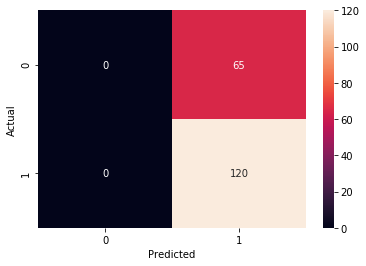

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 2. Barasa Sentiment Model

In [57]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [58]:
X_train_sent_barasa.shape

(2400, 4)

In [59]:
type(X_train_sent_barasa)

pandas.core.frame.DataFrame

In [60]:
X_train_sent_barasa = X_train_sent_barasa.to_numpy()
X_test_sent_barasa = X_test_sent_barasa.to_numpy()

In [61]:
type(X_train_sent_barasa)

numpy.ndarray

In [62]:
X_train_sent_barasa.shape

(2400, 4)

In [63]:
# Reshaping X_train & X_test
X_train_sent_barasa = X_train_sent_barasa[:, :, None]
X_test_sent_barasa = X_test_sent_barasa[:, :, None]

In [64]:
X_train_sent_barasa.shape

(2400, 4, 1)

In [65]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_sent_barasa.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [67]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_sent_barasa, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 2s 1ms/step - loss: 0.7421 - accuracy: 0.4077 - f1_m: 0.3302 - val_loss: 0.6090 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 2/10
1680/1680 [==============================] - 0s 16us/step - loss: 0.7302 - accuracy: 0.4631 - f1_m: 0.4682 - val_loss: 0.6160 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 3/10
1680/1680 [==============================] - 0s 16us/step - loss: 0.7288 - accuracy: 0.4512 - f1_m: 0.4517 - val_loss: 0.6229 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 4/10
1680/1680 [==============================] - 0s 17us/step - loss: 0.7230 - accuracy: 0.4601 - f1_m: 0.4622 - val_loss: 0.6299 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 5/10
1680/1680 [==============================] - 0s 27us/step - loss: 0.7172 - accuracy: 0.4708 - f1_m: 0.4868 - val_loss: 0.6368 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 6/10
1680/1680 [=================

In [68]:
save_model(model, 'model/LSTM smote_tfidf_sent_barasa')

Saved model to disk


In [69]:
history.history

{'val_loss': [0.6090264916419983,
  0.6159617900848389,
  0.622917115688324,
  0.6298672556877136,
  0.6367814540863037,
  0.6437312364578247,
  0.6507129073143005,
  0.6577463746070862,
  0.6647800803184509,
  0.6718450784683228],
 'val_accuracy': [0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8583333492279053,
  0.8569444417953491,
  0.8569444417953491,
  0.8583333492279053],
 'val_f1_m': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019230762496590614,
  0.03738316521048546,
  0.07207205891609192,
  0.17741931974887848],
 'loss': [0.7420740842819213,
  0.7302485988253639,
  0.7287902179218474,
  0.7229870483988807,
  0.7171917160352071,
  0.7166090743882315,
  0.7103703742935544,
  0.7090560493015108,
  0.7025143339520409,
  0.70264170113064],
 'accuracy': [0.4077381,
  0.46309525,
  0.45119047,
  0.46011904,
  0.47083333,
  0.4434524,
  0.46071428,
  0.4434524,
  0.4684524,
  0.43928573],
 'f1_m'

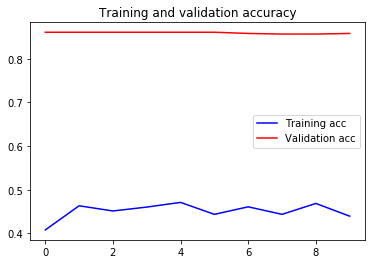

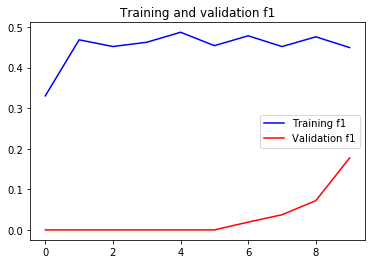

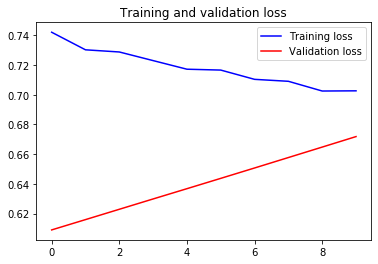

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [71]:
score = model.evaluate(X_test_sent_barasa, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 0s 8us/step

f1: 0.1230769157409668
accuracy: 0.3837837874889374
LOSS: 0.6981567144393921


In [72]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_sent_barasa, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_sent_barasa, verbose=0)

In [73]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [74]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [75]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.383784
Precision: 0.800000
Recall: 0.066667
F1 score: 0.123077
Kappa score: 0.025866


Text(0.5, 15.0, 'Predicted')

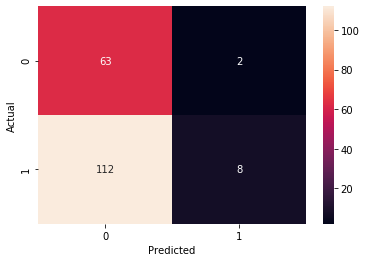

In [76]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 3. Barasa Sentiment Model + Cleaned Text

In [77]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [78]:
X_train_text_sent_barasa.shape

(2400, 10004)

In [79]:
type(X_train_text_sent_barasa)

numpy.ndarray

In [80]:
# Reshaping X_train & X_test
X_train_text_sent_barasa = X_train_text_sent_barasa[:, :, None]
X_test_text_sent_barasa = X_test_text_sent_barasa[:, :, None]

In [81]:
X_train_text_sent_barasa.shape

(2400, 10004, 1)

In [82]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_text_sent_barasa.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [84]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_text_sent_barasa, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 43s 25ms/step - loss: 0.7420 - accuracy: 0.4077 - f1_m: 0.3302 - val_loss: 0.6094 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 2/10
1680/1680 [==============================] - 26s 16ms/step - loss: 0.7299 - accuracy: 0.4631 - f1_m: 0.4682 - val_loss: 0.6168 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 3/10
1680/1680 [==============================] - 20s 12ms/step - loss: 0.7282 - accuracy: 0.4512 - f1_m: 0.4517 - val_loss: 0.6241 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 4/10
1680/1680 [==============================] - 19s 11ms/step - loss: 0.7222 - accuracy: 0.4601 - f1_m: 0.4622 - val_loss: 0.6314 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 5/10
1680/1680 [==============================] - 20s 12ms/step - loss: 0.7162 - accuracy: 0.4708 - f1_m: 0.4868 - val_loss: 0.6387 - val_accuracy: 0.8611 - val_f1_m: 0.0000e+00
Epoch 6/10
1680/1680 [===========

In [85]:
save_model(model, 'model/LSTM smote_tfidf_text_sent_barasa')

Saved model to disk


In [86]:
history.history

{'val_loss': [0.6094217300415039,
  0.6167536973953247,
  0.6241170167922974,
  0.6314093470573425,
  0.6387249827384949,
  0.6461318731307983,
  0.653588593006134,
  0.6611163020133972,
  0.6687363386154175,
  0.676434338092804],
 'val_accuracy': [0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.8611111044883728,
  0.862500011920929,
  0.8569444417953491,
  0.8583333492279053,
  0.8597221970558167,
  0.8402777910232544],
 'val_f1_m': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.019801978021860123,
  0.019047610461711884,
  0.0727272629737854,
  0.13675211369991302,
  0.20689652860164642],
 'loss': [0.7420128845033191,
  0.7299216156914121,
  0.7281739110038394,
  0.722176064196087,
  0.7162048237664359,
  0.7153658214069548,
  0.7089403317088172,
  0.7073373998914446,
  0.7007869164148967,
  0.7004903117815654],
 'accuracy': [0.4077381,
  0.46309525,
  0.45119047,
  0.46011904,
  0.47083333,
  0.4434524,
  0.46190476,
  0.44464287,
  0.46964285,
  0.4

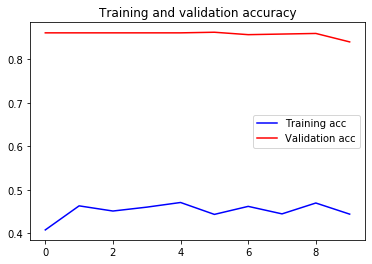

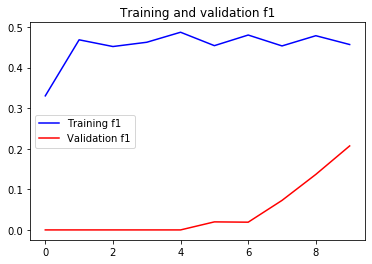

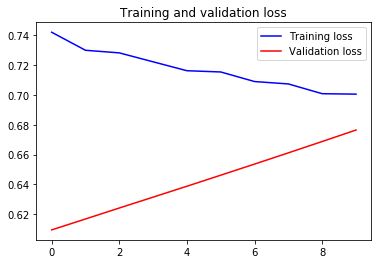

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [88]:
score = model.evaluate(X_test_text_sent_barasa, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 5ms/step

f1: 0.17777776718139648
accuracy: 0.4000000059604645
LOSS: 0.6960557103157043


In [89]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_text_sent_barasa, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_text_sent_barasa, verbose=0)

In [90]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [91]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [92]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.400000
Precision: 0.800000
Recall: 0.100000
F1 score: 0.177778
Kappa score: 0.039298


Text(0.5, 15.0, 'Predicted')

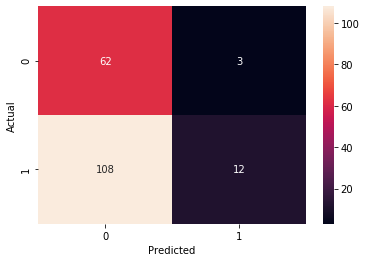

In [93]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 4. Trans Sentiment Model

In [94]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [95]:
X_train_sent_trans.shape

(2400, 4)

In [96]:
type(X_train_sent_trans)

pandas.core.frame.DataFrame

In [97]:
X_train_sent_trans = X_train_sent_trans.to_numpy()
X_test_sent_trans = X_test_sent_trans.to_numpy()

In [98]:
type(X_train_sent_trans)

numpy.ndarray

In [99]:
X_train_sent_trans.shape

(2400, 4)

In [100]:
# Reshaping X_train & X_test
X_train_sent_trans = X_train_sent_trans[:, :, None]
X_test_sent_trans = X_test_sent_trans[:, :, None]

In [101]:
X_train_sent_trans.shape

(2400, 4, 1)

In [102]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_sent_trans.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [104]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_sent_trans, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 1s 374us/step - loss: 0.7309 - accuracy: 0.4101 - f1_m: 0.3427 - val_loss: 0.6228 - val_accuracy: 0.8319 - val_f1_m: 0.0902
Epoch 2/10
1680/1680 [==============================] - 0s 9us/step - loss: 0.7219 - accuracy: 0.4762 - f1_m: 0.4950 - val_loss: 0.6294 - val_accuracy: 0.8111 - val_f1_m: 0.1905
Epoch 3/10
1680/1680 [==============================] - 0s 8us/step - loss: 0.7206 - accuracy: 0.4732 - f1_m: 0.5005 - val_loss: 0.6361 - val_accuracy: 0.8014 - val_f1_m: 0.2667
Epoch 4/10
1680/1680 [==============================] - 0s 9us/step - loss: 0.7155 - accuracy: 0.4827 - f1_m: 0.5238 - val_loss: 0.6428 - val_accuracy: 0.7722 - val_f1_m: 0.2679
Epoch 5/10
1680/1680 [==============================] - 0s 8us/step - loss: 0.7093 - accuracy: 0.5071 - f1_m: 0.5619 - val_loss: 0.6495 - val_accuracy: 0.7472 - val_f1_m: 0.2541
Epoch 6/10
1680/1680 [==============================] - 0s 8u

In [105]:
save_model(model, 'model/LSTM smote_tfidf_sent_trans')

Saved model to disk


In [106]:
history.history

{'val_loss': [0.6227784752845764,
  0.6293925046920776,
  0.6360716819763184,
  0.642785370349884,
  0.6495360732078552,
  0.656376838684082,
  0.6632081866264343,
  0.6700171828269958,
  0.6768089532852173,
  0.6836296916007996],
 'val_accuracy': [0.831944465637207,
  0.8111110925674438,
  0.8013888597488403,
  0.7722222208976746,
  0.7472222447395325,
  0.7319444417953491,
  0.7152777910232544,
  0.7111111283302307,
  0.7013888955116272,
  0.6958333253860474],
 'val_f1_m': [0.09022551774978638,
  0.19047613441944122,
  0.26666662096977234,
  0.2678571045398712,
  0.2540983259677887,
  0.26615965366363525,
  0.2545454204082489,
  0.25179851055145264,
  0.25087103247642517,
  0.25255969166755676],
 'loss': [0.7309361088843572,
  0.7219484124864851,
  0.7205835813567751,
  0.7155440500804356,
  0.7092555074464707,
  0.7095893002691723,
  0.7043905644189744,
  0.7019873216038659,
  0.6972309038752601,
  0.6965768734614054],
 'accuracy': [0.41011906,
  0.47619048,
  0.4732143,
  0.4827381

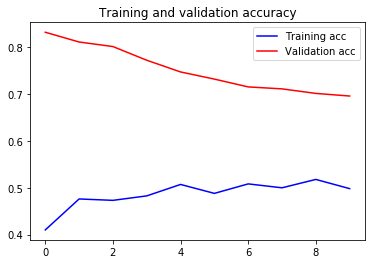

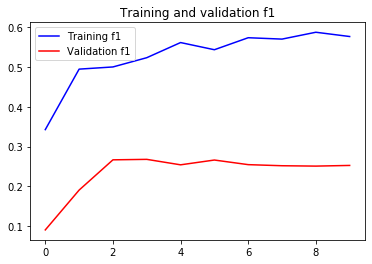

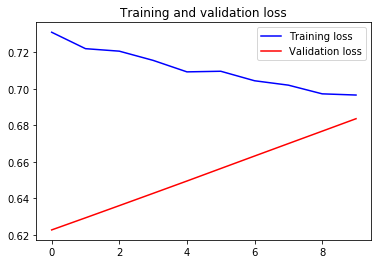

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [108]:
score = model.evaluate(X_test_sent_trans, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 0s 22us/step

f1: 0.3376622796058655
accuracy: 0.4486486613750458
LOSS: 0.6950432062149048


In [109]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_sent_trans, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_sent_trans, verbose=0)

In [110]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [111]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [112]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.448649
Precision: 0.764706
Recall: 0.216667
F1 score: 0.337662
Kappa score: 0.071815


Text(0.5, 15.0, 'Predicted')

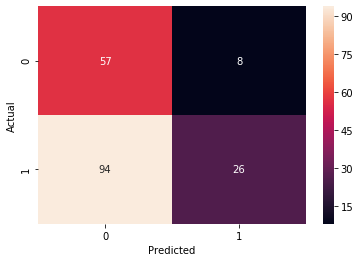

In [113]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 5. Trans Sentiment Model + Cleaned Text

In [114]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [115]:
X_train_text_sent_trans.shape

(2400, 10004)

In [116]:
type(X_train_text_sent_trans)

numpy.ndarray

In [117]:
# Reshaping X_train & X_test
X_train_text_sent_trans = X_train_text_sent_trans[:, :, None]
X_test_text_sent_trans = X_test_text_sent_trans[:, :, None]

In [118]:
X_train_text_sent_barasa.shape

(2400, 10004, 1)

In [119]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_text_sent_trans.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [121]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_text_sent_trans, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1680 samples, validate on 720 samples
Epoch 1/10
1680/1680 [==============================] - 23s 14ms/step - loss: 0.7311 - accuracy: 0.4101 - f1_m: 0.3427 - val_loss: 0.6218 - val_accuracy: 0.8319 - val_f1_m: 0.0902
Epoch 2/10
1680/1680 [==============================] - 20s 12ms/step - loss: 0.7225 - accuracy: 0.4762 - f1_m: 0.4950 - val_loss: 0.6284 - val_accuracy: 0.8097 - val_f1_m: 0.1893
Epoch 3/10
1680/1680 [==============================] - 19s 12ms/step - loss: 0.7210 - accuracy: 0.4738 - f1_m: 0.5016 - val_loss: 0.6352 - val_accuracy: 0.8014 - val_f1_m: 0.2667
Epoch 4/10
1680/1680 [==============================] - 18s 11ms/step - loss: 0.7159 - accuracy: 0.4839 - f1_m: 0.5258 - val_loss: 0.6422 - val_accuracy: 0.7694 - val_f1_m: 0.2655
Epoch 5/10
1680/1680 [==============================] - 18s 11ms/step - loss: 0.7093 - accuracy: 0.5077 - f1_m: 0.5633 - val_loss: 0.6494 - val_accuracy: 0.7417 - val_f1_m: 0.2619
Epoch 6/10
1680/1680 [==============================]

In [122]:
save_model(model, 'model/LSTM smote_tfidf_text_sent_trans')

Saved model to disk


In [123]:
history.history

{'val_loss': [0.6218312382698059,
  0.6283575892448425,
  0.635209321975708,
  0.6422363519668579,
  0.6493814587593079,
  0.6566386818885803,
  0.663930356502533,
  0.6711901426315308,
  0.6784566044807434,
  0.6858071088790894],
 'val_accuracy': [0.831944465637207,
  0.8097222447395325,
  0.8013888597488403,
  0.769444465637207,
  0.7416666746139526,
  0.7222222089767456,
  0.7152777910232544,
  0.7111111283302307,
  0.699999988079071,
  0.6958333253860474],
 'val_f1_m': [0.09022551774978638,
  0.18934905529022217,
  0.26666662096977234,
  0.2654866874217987,
  0.2619047164916992,
  0.2592592239379883,
  0.2545454204082489,
  0.25179851055145264,
  0.2499999701976776,
  0.25762706995010376],
 'loss': [0.7310848815100534,
  0.7224788836070469,
  0.7210392912228902,
  0.7158660882995243,
  0.7093306308700925,
  0.7095094822701954,
  0.7040755936077663,
  0.7014067104884556,
  0.6965379289218357,
  0.6955419438225883],
 'accuracy': [0.41011906,
  0.47619048,
  0.4738095,
  0.48392856,
 

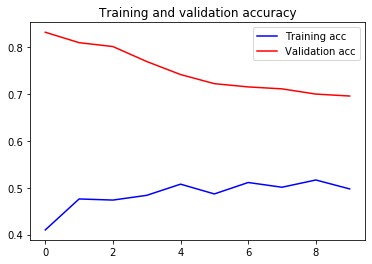

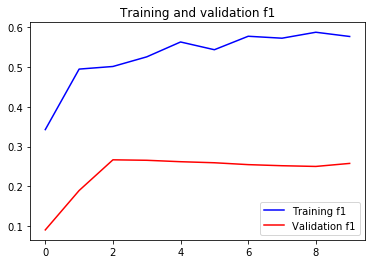

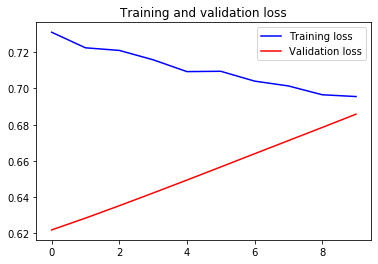

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [125]:
score = model.evaluate(X_test_text_sent_trans, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 5ms/step

f1: 0.3483870327472687
accuracy: 0.454054057598114
LOSS: 0.6941283345222473


In [126]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_text_sent_trans, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_text_sent_trans, verbose=0)

In [127]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [128]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [129]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.454054
Precision: 0.771429
Recall: 0.225000
F1 score: 0.348387
Kappa score: 0.078422


Text(0.5, 15.0, 'Predicted')

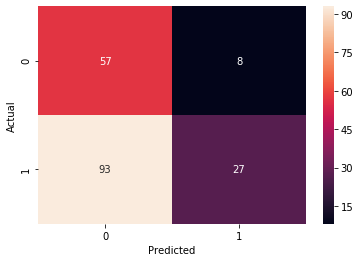

In [130]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')